In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import the libraries:**

In [15]:
# Imports here
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import seaborn as sns
import PIL
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
cwd = os.getcwd()

In [16]:
os.chdir('/content/drive/MyDrive/Udacity') 
path = os.getcwd()

print(path)
cwd = os.getcwd()

/content/drive/MyDrive/Udacity


**Load the data**

In [17]:
data_dir = 'Skin_Cancer/data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

Check the available training files (e.g. amount):

In [18]:
training_images = os.listdir(train_dir + '/melanoma')
training_images = training_images + os.listdir(train_dir + '/nevus')
training_images = training_images + os.listdir(train_dir + '/seborrheic_keratosis')
print("Number of Training Images: ", len(training_images))

validation_images = os.listdir(valid_dir + '/melanoma')
validation_images = validation_images + os.listdir(valid_dir + '/nevus')
validation_images = validation_images + os.listdir(valid_dir + '/seborrheic_keratosis')
print("Number of Validation Images: ", len(validation_images))

test_images = os.listdir(test_dir + '/melanoma')
test_images = test_images + os.listdir(test_dir + '/nevus')
test_images = test_images + os.listdir(test_dir + '/seborrheic_keratosis')
print("Number of Test Images: ", len(test_images))

print('')

melanoma_images = os.listdir(train_dir + '/melanoma')
melanoma_images = melanoma_images + os.listdir(valid_dir + '/melanoma')
melanoma_images = melanoma_images + os.listdir(test_dir + '/melanoma')
print("Number of Melanoma Images: ", len(melanoma_images))

nevus_images = os.listdir(train_dir + '/nevus')
nevus_images = nevus_images + os.listdir(valid_dir + '/nevus')
nevus_images = nevus_images + os.listdir(test_dir + '/nevus')
print("Number of Nevus Images: ", len(nevus_images))

seborrheic_keratosis_images = os.listdir(train_dir + '/seborrheic_keratosis')
seborrheic_keratosis_images = seborrheic_keratosis_images + os.listdir(valid_dir + '/seborrheic_keratosis')
seborrheic_keratosis_images = seborrheic_keratosis_images + os.listdir(test_dir + '/seborrheic_keratosis')
print("Number of Seborrheic Keratosis Images: ", len(seborrheic_keratosis_images))

Number of Training Images:  2000
Number of Validation Images:  150
Number of Test Images:  600

Number of Melanoma Images:  521
Number of Nevus Images:  1843
Number of Seborrheic Keratosis Images:  386


**Visualization of the different Training Images**

*****************Random Images with Melanoma**************************
/content/drive/MyDrive/Udacity


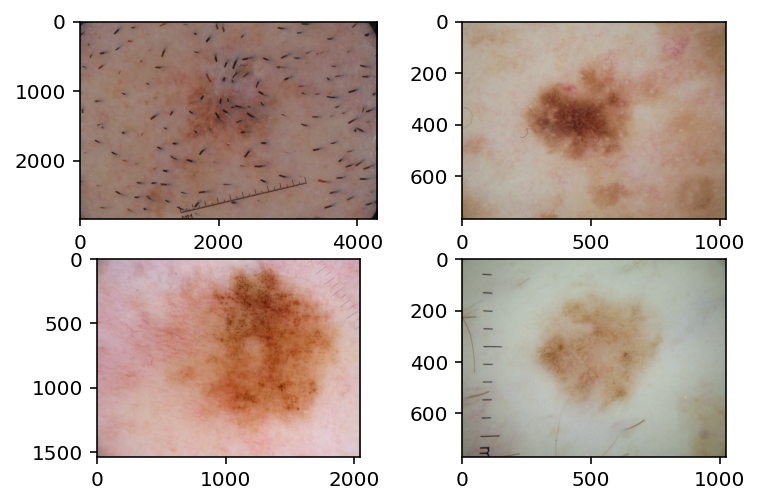

In [19]:
## Visualize Random Training images of Melanoma
melanoma_images_training = os.listdir(train_dir + '/melanoma')
random_indices = np.random.randint(0, len(melanoma_images_training), size=4)
print("*****************Random Images with Melanoma**************************")
random_images = np.array(melanoma_images_training)[random_indices.astype(int)]
 

print(cwd)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/melanoma', random_images[0])))
axarr[0,1].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/melanoma', random_images[1])))
axarr[1,0].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/melanoma', random_images[2])))
axarr[1,1].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/melanoma', random_images[3])))

*****************Random Images with Seborrheic Keratosis**************************


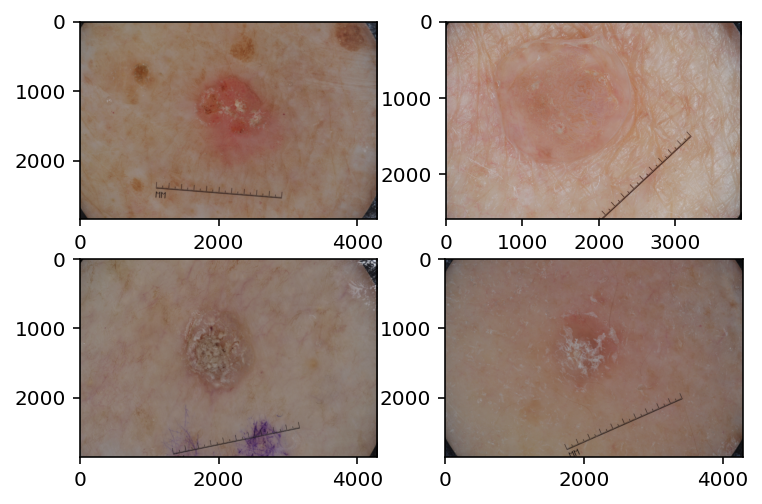

In [20]:
## Visualize Random Training images of Seborrheic Keratosis
seborrheic_keratosis_images_training = os.listdir(train_dir + '/seborrheic_keratosis')
random_indices = np.random.randint(0, len(seborrheic_keratosis_images_training), size=4)
print("*****************Random Images with Seborrheic Keratosis**************************")
random_images = np.array(seborrheic_keratosis_images_training)[random_indices.astype(int)]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/seborrheic_keratosis', random_images[0])))
axarr[0,1].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/seborrheic_keratosis', random_images[1])))
axarr[1,0].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/seborrheic_keratosis', random_images[2])))
axarr[1,1].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/seborrheic_keratosis', random_images[3])))

*****************Random Images with Nevus**************************


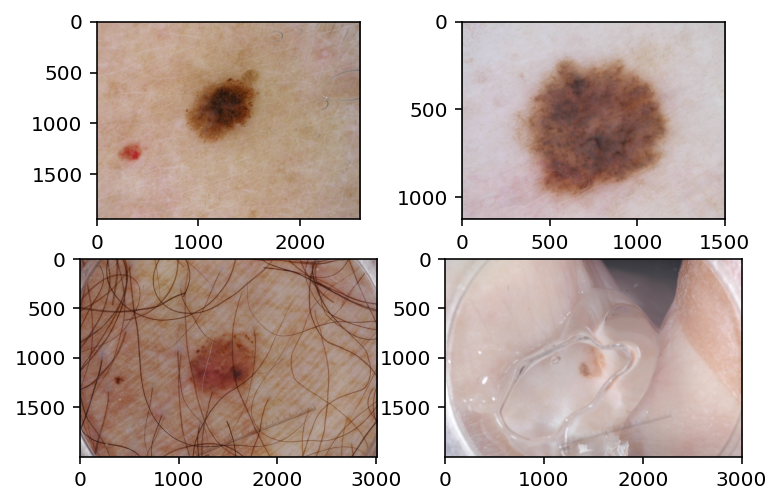

In [21]:
## Visualize Random Training images of Nevus
nevus_images_training = os.listdir(train_dir + '/nevus')
random_indices = np.random.randint(0, len(nevus_images_training), size=4)
print("*****************Random Images with Nevus**************************")
random_images = np.array(nevus_images_training)[random_indices.astype(int)]

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/nevus', random_images[0])))
axarr[0,1].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/nevus', random_images[1])))
axarr[1,0].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/nevus', random_images[2])))
axarr[1,1].imshow(mpimg.imread(os.path.join(cwd, train_dir + '/nevus', random_images[3])))

**Transformation of Images to 224x224 to enable the use of a pretrained network:**

In [22]:
# Pass transforms in here, then run the next cell to see how the transforms look
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])
valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])


train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=valid_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)


***Pretrained Model VGG16 loaded:***

In [23]:
# TODO: Build and train your network
model = models.vgg16(pretrained=True)

model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Definition of Feedforward Network**:

In [24]:
#Feedforward Network as classifier defined
for param in model.parameters():
    param.requires_grad = False

from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(25088, 4096)),
                          ('relu', nn.ReLU()),
                          ('dropout1', nn.Dropout(p=0.15)),
                          ('fc2', nn.Linear(4096, 3)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))
    
model.classifier = classifier
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Training of the Classifier:**

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
print(device)

cpu


In [26]:
# Device agnostic code, automatically uses CUDA if it's enabled
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
print(device)
# change to device
model.to(device);



#Train the classifier

criterion = nn.NLLLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 5
steps = 0

train_losses, test_losses, valid_losses = [], [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        #print(labels)
        #print(labels.shape)
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        #print(labels)
        #print(labels.shape)
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        valid_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in validloader:
                
                images = images.to(device)
                labels = labels.to(device)
                log_ps = model(images)
                valid_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        model.train()        
        train_losses.append(running_loss/len(trainloader))
        valid_losses.append(valid_loss/len(validloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Valid Loss: {:.3f}.. ".format(valid_loss/len(validloader)),
              "Valid Accuracy: {:.3f}".format(accuracy/len(validloader)))
model_trained=model

cpu
Epoch: 1/5..  Training Loss: 2.806..  Valid Loss: 0.849..  Valid Accuracy: 0.572
Epoch: 2/5..  Training Loss: 0.737..  Valid Loss: 0.772..  Valid Accuracy: 0.629
Epoch: 3/5..  Training Loss: 0.676..  Valid Loss: 0.869..  Valid Accuracy: 0.548
Epoch: 4/5..  Training Loss: 0.662..  Valid Loss: 0.821..  Valid Accuracy: 0.593
Epoch: 5/5..  Training Loss: 0.641..  Valid Loss: 0.797..  Valid Accuracy: 0.624


**Testing of Trained Network:**

In [27]:
# TODO: Do validation on the test set
correct = 0
total = 0
with torch.no_grad():
    model.eval()
    for images, labels in testloader:
                
                images = images.to(device)
                labels = labels.to(device)
                log_ps = model(images)
                _, predicted = torch.max(log_ps.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                print('Accuracy of Batch Test Images: {:.1f}%'.format(100*correct/total))


print('Accuracy achieved by the network on test images is: %d%%' % (100 * correct / total))

Accuracy of Batch Test Images: 12.5%
Accuracy of Batch Test Images: 29.7%
Accuracy of Batch Test Images: 49.0%
Accuracy of Batch Test Images: 59.4%
Accuracy of Batch Test Images: 65.3%
Accuracy of Batch Test Images: 68.8%
Accuracy of Batch Test Images: 71.9%
Accuracy of Batch Test Images: 74.2%
Accuracy of Batch Test Images: 70.1%
Accuracy of Batch Test Images: 69.0%
Accuracy achieved by the network on test images is: 69%


**Saving of Trained Model:**

In [28]:
# TODO: Save the checkpoint 
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

model_trained=model
model_trained.class_to_idx = train_data.class_to_idx
model_trained.cpu()

model_state = {              
             'state_dict': model_trained.state_dict(),
             'optimizer' : optimizer.state_dict(),
             'class_to_idx': model_trained.class_to_idx,
             'classifier': model_trained.classifier,
             }

torch.save(model_state, 'checkpoint1.pth')

Our model: 

 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding